# Permutation of group differences. 

In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import scona as scn
import matplotlib.pyplot as plt
import nilearn.plotting as plot
import functions.plotting_functions as Pfun
import functions.statistical_functions as Sfun
import seaborn as sns
sns.set_style('dark')

This code creates the enviornmental variable for where the data is stored. Create a .env file in the directory with the file path to data.

In [2]:
from decouple import config

data = config('data')

In [3]:
lh_volume = pd.read_csv(f'{data}/lh_volume.dat',sep='\t').drop([
                     'BrainSegVolNotVent', 'eTIV'],axis=1).rename(columns={'lh.aparc.volume':'G-Number'})

rh_volume =  pd.read_csv(f'{data}/rh_volume.dat',sep='\t').drop([
                       'BrainSegVolNotVent', 'eTIV','rh.aparc.volume'],axis=1)

group = pd.read_csv(f'{data}/cortical_measures.csv').iloc[0:,2]

volume = pd.concat([lh_volume, rh_volume, group],axis=1)

names = list(volume.columns.drop(['G-Number','age_adjusted_group']))

centroids = pd.read_csv(f'{data}/atlas.csv')

centroids = centroids[['x.mni', 'y.mni', 'z.mni']].to_numpy()

group = volume.groupby('age_adjusted_group')
aan = group.get_group('AAN').reset_index(drop=True)
hc = group.get_group('HC').reset_index(drop=True)
wr = group.get_group('WR').reset_index(drop=True)
aan.head()

,G-Number,lh_bankssts_volume,lh_caudalanteriorcingulate_volume,lh_caudalmiddlefrontal_volume,lh_cuneus_volume,lh_entorhinal_volume,lh_fusiform_volume,lh_inferiorparietal_volume,lh_inferiortemporal_volume,lh_isthmuscingulate_volume,...,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,age_adjusted_group
0,sub-G2001,2885.0,1875.0,5887.0,2985.0,2195.0,8822.0,12823.0,10927.0,2617.0,...,15777.0,21509.0,13309.0,11317.0,9869.0,1616.0,3326.0,999.0,6634.0,AAN
1,sub-G2002,3685.0,1842.0,7653.0,4092.0,2116.0,11551.0,13769.0,13400.0,2909.0,...,20591.0,23157.0,14659.0,14117.0,8507.0,1640.0,2310.0,1084.0,7527.0,AAN
2,sub-G2003,3865.0,2396.0,6341.0,2826.0,2120.0,11673.0,13934.0,12608.0,2553.0,...,17216.0,23072.0,13261.0,12634.0,10292.0,1457.0,2316.0,875.0,7393.0,AAN
3,sub-G2004,2621.0,2329.0,6160.0,2971.0,2017.0,9591.0,13000.0,11468.0,2395.0,...,14858.0,19432.0,13154.0,11849.0,9458.0,1216.0,2477.0,854.0,7986.0,AAN
4,sub-G2005,2276.0,1949.0,7127.0,3406.0,2480.0,10771.0,9233.0,12424.0,2463.0,...,14933.0,19112.0,10911.0,10574.0,8782.0,1606.0,2971.0,842.0,6432.0,AAN


In [4]:
aan_graphs = Sfun.create_graphs(aan.iloc[:,1:69],names, centroids)
wr_graphs = Sfun.create_graphs(wr.iloc[:,1:69],names, centroids)
hc_graphs = Sfun.create_graphs(hc.iloc[:,1:69],names, centroids)

In [5]:
aan_values = aan_graphs['graph_threshold'].calculate_global_measures()
wr_values = wr_graphs['graph_threshold'].calculate_global_measures()
hc_values = hc_graphs['graph_threshold'].calculate_global_measures()

In [6]:
participants = pd.concat([aan, wr, hc], ignore_index=True)
participants.head()

,G-Number,lh_bankssts_volume,lh_caudalanteriorcingulate_volume,lh_caudalmiddlefrontal_volume,lh_cuneus_volume,lh_entorhinal_volume,lh_fusiform_volume,lh_inferiorparietal_volume,lh_inferiortemporal_volume,lh_isthmuscingulate_volume,...,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,age_adjusted_group
0,sub-G2001,2885.0,1875.0,5887.0,2985.0,2195.0,8822.0,12823.0,10927.0,2617.0,...,15777.0,21509.0,13309.0,11317.0,9869.0,1616.0,3326.0,999.0,6634.0,AAN
1,sub-G2002,3685.0,1842.0,7653.0,4092.0,2116.0,11551.0,13769.0,13400.0,2909.0,...,20591.0,23157.0,14659.0,14117.0,8507.0,1640.0,2310.0,1084.0,7527.0,AAN
2,sub-G2003,3865.0,2396.0,6341.0,2826.0,2120.0,11673.0,13934.0,12608.0,2553.0,...,17216.0,23072.0,13261.0,12634.0,10292.0,1457.0,2316.0,875.0,7393.0,AAN
3,sub-G2004,2621.0,2329.0,6160.0,2971.0,2017.0,9591.0,13000.0,11468.0,2395.0,...,14858.0,19432.0,13154.0,11849.0,9458.0,1216.0,2477.0,854.0,7986.0,AAN
4,sub-G2005,2276.0,1949.0,7127.0,3406.0,2480.0,10771.0,9233.0,12424.0,2463.0,...,14933.0,19112.0,10911.0,10574.0,8782.0,1606.0,2971.0,842.0,6432.0,AAN


In [7]:
measures = ['average_clustering', 'average_shortest_path_length', 'assortativity', 'modularity', 'efficiency']


true_value = {
    'average_clustering':[],
    'average_shortest_path_length':[], 
    'assortativity':[], 
    'modularity':[], 
    'efficiency':[]

}   

In [8]:
for measure in measures:
    true_val = aan_values[measure] - hc_values[measure] #- wr_values[measure]
    true_value[measure].append(true_val)

In [9]:
true_value

{'average_clustering': [0.10971236784334115],
 'average_shortest_path_length': [0.0460930640913082],
 'assortativity': [0.08252429022785399],
 'modularity': [0.014687211449676829],
 'efficiency': [-0.004243488440153209]}

In [10]:
import scipy.stats as stats
permutations = 10

results ={
    
    'average_clustering':[],
    'average_shortest_path_length':[], 
    'assortativity':[], 
    'modularity':[], 
    'efficiency':[]

}

In [11]:
for perm in range(permutations):
    group_1_participants = participants.sample(n=len(aan['G-Number']))
    #group_2_participants = participants.sample(n=len(wr['G-Number']))
    group_3_participants = participants.sample(n=len(hc['G-Number']))
    
    group1_graphs = Sfun.create_graphs(group_1_participants.iloc[:,1:69],names, centroids)
    #group2_graphs = Sfun.create_graphs(group_2_participants.iloc[:,1:69],names, centroids)
    group3_graphs = Sfun.create_graphs(group_3_participants.iloc[:,1:69],names, centroids)
    
    group1_values = group1_graphs['graph_threshold'].calculate_global_measures()
    #group2_graphs = group2_graphs['graph_threshold'].calculate_global_measures()
    group3_graphs = group3_graphs['graph_threshold'].calculate_global_measures()

    for meas in measures:
        crit_val = group1_values[meas] -  group3_graphs[meas]
        results[meas].append(crit_val)

In [13]:
results['average_clustering']

[0.011522592059320047,
 0.005083885395987087,
 0.0012266886753544703,
 0.010851307426272383,
 0.003904689039652909,
 -0.01351857386175448,
 -0.09453339377712028,
 0.006782461088225278,
 -0.027421642895372522,
 0.00589399345961461]

In [25]:
max(results['modularity'])

0.02211257309941511

In [20]:
true_value

{'average_clustering': [0.10971236784334115],
 'average_shortest_path_length': [0.0460930640913082],
 'assortativity': [0.08252429022785399],
 'modularity': [0.014687211449676829],
 'efficiency': [-0.004243488440153209]}

In [15]:
import math
for measure in measures:
    tcrit_value = true_value[measure]
    ctvalue = results[measure]
    array = np.array(ctvalue)
    mean = array.mean()
    std_dev = np.std(ctvalue)
    lower_2std = mean - 2*std_dev
    upper_2std =  mean + 2*std_dev
    lower_1std = mean - std_dev
    upper_1std = mean + std_dev

    if tcrit_value[0] >= mean:
            sum_list = [val for val in ctvalue if val >= tcrit_value[0]]

    else:
           sum_list = [val for val in ctvalue if val <= tcrit_value[0]]


        
    pval = len(sum_list) / permutations
    print(measure, pval)

average_clustering 0.0
average_shortest_path_length 0.4
assortativity 0.1
modularity 0.1
efficiency 0.5


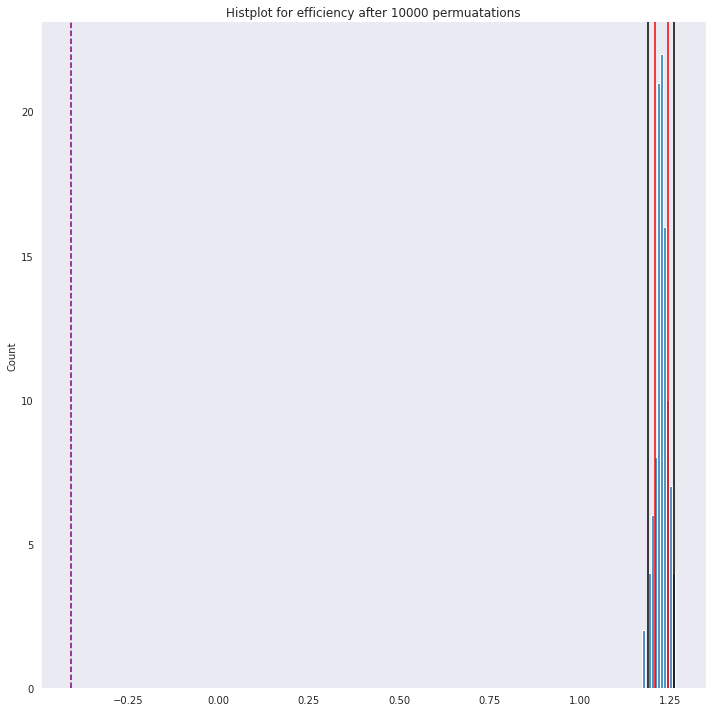

In [46]:
Pfun.pval_plotting(results['efficiency'], true_value['efficiency'], 'efficiency', 10000 )

In [52]:
measure = 'average_clustering'
tcrit_value = true_value[measure]
ctvalue = results[measure]
array = np.array(ctvalue)
mean = array.mean()
std_dev = np.std(ctvalue)
lower_2std = mean - 2*std_dev
upper_2std =  mean + 2*std_dev
lower_1std = mean - std_dev
upper_1std = mean + std_dev
if tcrit_value >= mean:
        sum = [val for val in ctvalue if val >= tcrit_value]
else:
       sum = [print(val) for val in ctvalue]# if val <= tcrit_value]
    
pval = len(sum) / permutations
print(measure, pval)

-0.4335697197868893
-0.40969759153270546
-0.504202702597863
-0.5120135853714711
-0.30403178710230544
-0.42404392134666186
-0.4679932196247137
-0.5196194530344879
-0.4053009686176707
-0.4221859886682365
-0.48719890449820064
-0.464153815982203
-0.3510852453509608
-0.3777701201918836
-0.32532870110285544
-0.3771884265339281
-0.3490667058077563
-0.40412785181939814
-0.30915163391712447
-0.45506453423937965
-0.32439742258955734
-0.3420995572052437
-0.4860202043349567
-0.41507862261914336
-0.3217379605628927
-0.43787117417187926
-0.35743217794421156
-0.31197128727447687
-0.40979374049397727
-0.3670907866403657
-0.3220400511485923
-0.4074928639316708
-0.33091185111615756
-0.5161409419372054
-0.3526766308843996
-0.35840743972014444
-0.5170091864788917
-0.43416992744735355
-0.5086813108598454
-0.392204424683818
-0.4960094973075446
-0.3462881779126244
-0.4312730298170898
-0.3977904783807625
-0.32567580154859366
-0.3862460532054848
-0.4470692435532211
-0.48833973662482555
-0.38004809833166314
-0.

In [39]:
pval

0.3

In [ ]:
measures = ['average_clustering', 'average_shortest_path_length', 'assortativity', 'modularity', 'efficiency'] 
measure = measures[1]



tcrit_value = aan_global_measures[measure].mean() - hc_global_measures[measure].mean() #- wr_global_measures[measure].mean()


permutations = 10000

combined = np.concatenate([aan_global_measures[measure].values, hc_global_measures[measure].values]) #wr_global_measures[measure].values, 

index_1 = len(aan_global_measures[measure].values)
#index_2 = len(wr_global_measures[measure].values) + len(wr_global_measures[measure].values)

ctvalue=[]
for perm in range(permutations):
        np.random.shuffle(combined)
        random_group_one = combined[0: index_1]
        #random_group_two = combined[index_1: index_2]
        random_group_three = combined[index_1:]
        crit_val = random_group_one.mean() - random_group_three.mean() #- random_group_two.mean() 
        ctvalue.append(crit_val)

array = np.array(ctvalue)
mean = array.mean()
std_dev = np.std(ctvalue)
lower_2std = mean - 2*std_dev
upper_2std =  mean + 2*std_dev
lower_1std = mean - std_dev
upper_1std = mean + std_dev

if tcrit_value >= mean:
        sum = [val for val in ctvalue if val >= tcrit_value]
        print('upper')
else:
        sum = [val for val in ctvalue if val <= tcrit_value]
        print('lower')

        
pval = len(sum) / permutations



print(pval)

print(tcrit_value)
print([lower_2std, upper_2std])
hist = sns.displot(data=ctvalue, height=10).set(title=f'Histplot for {measure} after {permutations} permuatations')
hist.refline(x=tcrit_value, color='purple')
hist.refline(x=lower_2std, linestyle='-', color='black')
hist.refline(x=upper_2std, linestyle='-', color='black')
hist.refline(x=lower_1std, linestyle='-', color='red')
hist.refline(x=upper_1std, linestyle='-', color='red')
plt.show()

In [ ]:
measures = ['average_clustering', 'average_shortest_path_length', 'assortativity', 'modularity', 'efficiency'] 
measure = measures[4]

tcrit_value = aan_global_measures[measure].mean() - wr_global_measures[measure].mean() - hc_global_measures[measure].mean() 

permutations = 10000

combined = np.concatenate([aan_global_measures[measure].values, wr_global_measures[measure].values, hc_global_measures[measure].values]) 

index_1 = len(aan_global_measures[measure].values)
index_2 = len(wr_global_measures[measure].values) + len(wr_global_measures[measure].values)

ctvalue=[]

for perm in range(permutations):
        np.random.shuffle(combined)
        random_group_one = combined[0: index_1]
        random_group_two = combined[index_1: index_2]
        random_group_three = combined[index_1:]
        crit_val = random_group_one.mean() - random_group_two.mean() - random_group_three.mean()  
        ctvalue.append(crit_val)

mean_val = Sfun.mean_std(ctvalue)


if tcrit_value >= mean_val['mean']:
        sum = [val for val in ctvalue if val >= tcrit_value]
        print('upper')
else:
        sum = [val for val in ctvalue if val <= tcrit_value]
        print('lower')
     
     #if tcrit_value > 0 and mean > 0:
     #           sum = [val for val in ctvalue if abs(val) <= abs(tcrit_value)]
     #           print('lower 1')
     #else:
     #           sum = [val for val in ctvalue if abs(val) >= abs(tcrit_value)]
     #           print('lower 2')

        
        
pval = len(sum) / permutations



print(pval)

print(abs(tcrit_value))
print(abs(mean_val['mean']))
Pfun.pval_plotting(ctvalue, tcrit_value, measure, permutations)


In [ ]:
def monte_carlo(group_one, group_two, group_three, permutations, plotting=False, measure='None'):
    
    '''
    
    Function to run a monte_carlo permuation hypothesis testing.
    
    Calculates a critical value then randomly shuffles groups calculating the crticial value 
    for each permutation.

    Pval calculated as:
    sum of all values greater than critical value / number of permutations

    Parameters
    ----------------------------------------------
    group one: numpy array of values for group one
    group one: numpy array of values for group two
    group one: numpy array of values for group three
    permutations: int, number of permutations to perform.

    Returns
    ---------------------------------------------
    results: dict object with critical value, pvalue and std
    
    '''

    critical_value = group_one.mean() - group_two.mean() - group_three.mean()
    combined = np.concatenate([group_one, group_two, group_three])

    index_1 = len(group_one)
    index_2 = len(group_two) + len(group_two)

    ctvalue = []

    for perm in range(permutations):
        np.random.shuffle(combined)
        random_group_one = combined[0: index_1]
        random_group_two = combined[index_1: index_2]
        random_group_three = combined[index_2:]
        crit_val = random_group_one.mean() - random_group_two.mean() - random_group_three.mean()
        ctvalue.append(crit_val)
    
    array = np.array(ctvalue)
    mean = array.mean()
    std_dev = np.std(ctvalue)
    lower_2std = mean - 2*std_dev
    upper_2std =  mean + 2*std_dev

    if tcrit_value >= mean:
            sum = [val for val in ctvalue if val >= tcrit_value]

    else:
            sum = [val for val in ctvalue if val <= tcrit_value]
             
    pval = len(sum) / permutations



print(pval)

print(abs(tcrit_value))
print(abs(mean))
#print([lower_2std, upper_2std])
hist = sns.displot(data=ctvalue, height=10).set(title=f'Histplot for {measure} after {permutations} permuatations')
hist.refline(x=tcrit_value, color='purple')
hist.refline(x=lower_2std, linestyle='-', color='black')
hist.refline(x=upper_2std, linestyle='-', color='black')
plt.show()

    result = {'critval':critical_value, 'pval': pval,'lower_std':lower_2std, 'upper_std':upper_2std}

    if plotting == True:
        pval_plotting(ctvalue, critical_value, measure, permutations)

    return result

In [ ]:
measure = 'assortativity' 
plots_for_pval = monte_carlo(aan_global_measures[measure].values, wr_global_measures[measure].values, hc_global_measures[measure].values, permutations=50000, plotting=True, measure=measure)

In [ ]:
for measure in aan_global_measures.columns: 
    eff = monte_carlo(aan_global_measures[measure].values, wr_global_measures[measure].values, hc_global_measures[measure].values, permutations=50000)
    print(eff)

In [ ]:
def monte_carlo_2(group_one, group_two, permutations):
    
    '''
    Function to run a monte_carlo permuation hypothesis testing.
    
    Calculates a critical value then randomly shuffles groups calculating the crticial value 
    for each permutation.

    Pval calculated as:
    sum of all values greater than critical value / number of permutations

    Parameters
    ----------------------------------------------
    group one: numpy array of values for group one
    group one: numpy array of values for group two
    group one: numpy array of values for group three
    permutations: int, number of permutations to perform.

    Returns
    ---------------------------------------------
    results: dict object with critical value and pvalue
    
    '''

    critical_value = group_one.mean() - group_two.mean()
    combined = np.concatenate([group_one, group_two])

    ctvalue = []

    index_1 = len(group_one)

    for perm in range(permutations):
        np.random.shuffle(combined)
        random_group_one = combined[:index_1]
        random_group_two = combined[index_1:]
        crit_val = random_group_one.mean() - random_group_two.mean() 
        ctvalue.append(crit_val)
    
    sum = [val for val in ctvalue if abs(val) >= abs(critical_value)]
    
    #print(len(sum))
    #print('\n', ctvalue,'\n')

    pval = len(sum) / permutations

    result = {'critval':critical_value, 'pval': pval}

    return result

In [ ]:
for measure in aan_global_measures.columns: 
    eff = monte_carlo_2(aan_global_measures[measure].values, hc_global_measures[measure].values, permutations=50000)
    print(f'Group difference between AAN and HC for {measure}','pval=', eff['pval'],'critical value:',eff['critval'])

In [ ]:
for measure in aan_global_measures.columns: 
    eff = monte_carlo_2(aan_global_measures[measure].values, wr_global_measures[measure].values, permutations=50000)
    print(f'Group difference between AAN and WR for {measure}','pval=', eff['pval'],'critical value:',eff['critval'])

In [ ]:
for measure in aan_global_measures.columns: 
    eff = monte_carlo_2(hc_global_measures[measure].values, wr_global_measures[measure].values, permutations=50000)
    print(f'Group difference between HC and WR for {measure}','pval=', eff['pval'],'critical value:',eff['critval'])